In [218]:
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib

from scipy.fftpack import fft, dct, idct
import numpy as np
import pandas as pd
import os
from PIL import Image

# MAT 167: Homework Assignment #1

* Name: Mitchell Layton
* Student ID #: 912307956
* Email: mrlayton@ucdavis.edu

#### (Code and results diplayed inline using appropriate Python packages)

## Problem 1.

## (a)

In [219]:
# reading the tiff file after putting it into the current working directory
ind = os.listdir().index('plant.tiff')
file = os.listdir()[ind]

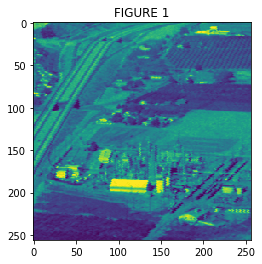

In [220]:
# using PIL package for reading and showing the .tiff file & displaying with matplotlib imshow for inline plots
img = Image.open(file)
img_grey = img.convert('L')
img = np.array(img_grey, dtype=np.float)
matplotlib.pyplot.title('FIGURE 1', fontdict=None, loc='center', pad=None)

imshow(np.asarray(img))

## (b)
* Scipy was the best option for support with the dct function
* According to Scipy Docs: "For a single dimension array x, dct(x, norm='ortho') is equal to MATLAB dct(x)."
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html#scipy-fftpack-dct

In [221]:
y = dct(dct(np.asarray(img).T, norm='ortho').T, norm='ortho')

# Indexing y at values where y is less than 10, and setting them equal to zero
y[abs(y[:])<10] = 0

# using numpy to reshape the matrix
y = np.reshape(y,(256,256))
yy = y.copy()

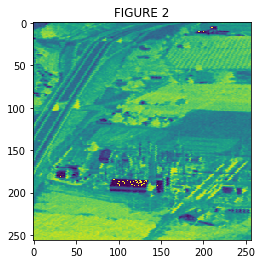

In [222]:
# inverse dct used here
xx = idct(idct(y.T, norm='ortho').T, norm='ortho')
# In Python, to see image using PIL package, we need to conver the idct function results into
# a usable Image from our array which needs to be converted into a unsigned 8-bit integer
array = Image.fromarray(xx.astype('uint8')*255)
matplotlib.pyplot.title('FIGURE 2', fontdict=None, loc='center', pad=None)

imshow(np.asarray(array))

## (c) 
* To compute the percentage of zero components of y we just need to total up the number of True's in our boolean statement and divide by the total number of componenets (in this case 256*256 = 65536)

In [223]:
zeros = sum(y[abs(y[:])<10] == 0)
total = 256*256
print('There is a', str(round((zeros/total)*100,3))+'% of zero components of y.')

There is a 69.035% of zero components of y.


## (d) 
* Carrying out the same compression with the canoncal basis from our zero'd out (more sparse) matrix from part (b) 

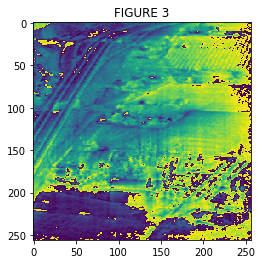

In [224]:
Y = dct(dct(np.asarray(yy).T, norm='ortho').T, norm='ortho')
array_2 = Image.fromarray(Y.astype('uint8')*255)
matplotlib.pyplot.title('FIGURE 3', fontdict=None, loc='center', pad=None)

imshow(np.asarray(array_2))

### Problem 1.

# (a) 
* Construct 8 × 11 term-document matrix.
* Utilizing pandas and sklearn for TDM

In [261]:
import re
import nltk
import string

In [226]:
documents = [
    'NIST Handbook of Mathematical Functions',
    'The Princeton Companion to Mathematics',
    'Table of Integrals, Series, and Products',
    'Linear Integral Equations',
    'Proofs from THE BOOK',
    'The Book of Numbers',
    'Number Theory in Science and Communication',
    'Green’s Functions and Boundary Value Problems',
    'Discourse on Fourier Series',
    'Basic Linear Partial Differential Equations',
    'Mathematical Physics, An Advanced Course'
]

terms = ['book','equations','function','integral','linear','mathematics','number','series']

* Before we process the document and query, we need to eliminate stop words (removing useless words such as 'as','the', etc.) and carry out stemming (convert to baseline word e.g. fishes to fish)

## Preprocessing

In [265]:
from nltk.corpus import stopwords 
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
import gensim

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english')).union(set(punctuation))
regex = re.compile('[’!#%$\"&)\'(+*-/.;:=<?>@\[\]_^`\{\}|~"\\\\"]')
translator = str.maketrans('', '', string.punctuation)


# Removing stop words and punctuation
doc_list = [[w.lower() for w in word_tokenize(text)] for text in documents]
for i in range(len(doc_list)):
    doc_list[i] = list(w for w in doc_list[i] if not w in stop_words)
    for j in range(len(doc_list[i])):
        doc_list[i][j] = doc_list[i][j].translate(translator)
    
doc_list



[['nist', 'handbook', 'mathematical', 'functions'],
 ['princeton', 'companion', 'mathematics'],
 ['table', 'integrals', 'series', 'products'],
 ['linear', 'integral', 'equations'],
 ['proofs', 'book'],
 ['book', 'numbers'],
 ['number', 'theory', 'science', 'communication'],
 ['green', '’', 'functions', 'boundary', 'value', 'problems'],
 ['discourse', 'fourier', 'series'],
 ['basic', 'linear', 'partial', 'differential', 'equations'],
 ['mathematical', 'physics', 'advanced', 'course']]

In [234]:
dictionary = gensim.corpora.Dictionary(gen_docs)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
print(corpus)
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)


[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1)], [(7, 2), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1)], [(15, 1), (16, 1)], [(15, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1)], [(0, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(10, 1), (27, 1), (28, 1)], [(12, 1), (14, 1), (29, 1), (30, 1), (31, 1)], [(2, 1), (7, 1), (32, 1), (33, 1), (34, 1)]]
TfidfModel(num_docs=11, num_nnz=42)


In [106]:
query_doc = [w.lower() for w in word_tokenize("Linear Function")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['linear', 'function']
[(18, 1)]
[(18, 1.0)]


### Question 3 below on scanned paper document